In [9]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
from astropy.io import ascii
import numpy as np
import sys
sys.path.append('/Users/yaolun/programs/misc/')
from process_pacsphot import proc_PACSphot

In [18]:
obj = 'L1157'

# read in photometry
photfile = '/Volumes/SD-Mac/pacsphot_cdf/'+obj+'_phot_sect.txt'
phot = proc_PACSphot(photfile)

# read in spectrum
specfile = '/Volumes/SD-Mac/CDF_archive_test/'+obj+'/pacs/data/'+obj+'_pacs_weighted.txt'
spec = ascii.read(specfile)

<Container object of 3 artists>

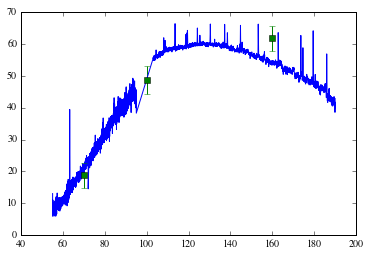

In [19]:
plt.plot(spec['Wavelength(um)'], spec['Flux_Density(Jy)'])
plt.errorbar(phot['wavelength(um)'], phot['flux(Jy)'], yerr=phot['uncertainty(Jy)'], fmt='s')

In [31]:
def PACS1d_inspect(obj):
    import matplotlib.pyplot as plt
    from astropy.io import ascii
    import numpy as np
    import sys
    import os
    sys.path.append('/Users/yaolun/programs/misc/')
    from process_pacsphot import proc_PACSphot
    
    # read in photometry
    photfile = '/Volumes/SD-Mac/pacsphot_cdf/'+obj+'_phot_sect.txt'
    phot = proc_PACSphot(photfile)

    # read in spectrum
    specfile = '/Volumes/SD-Mac/CDF_archive_test/'+obj+'/pacs/data/'+obj+'_pacs_weighted.txt'
    spec = ascii.read(specfile)
    

    
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)
    
    ax.plot(spec['Wavelength(um)'], spec['Flux_Density(Jy)'], linewidth=0.7, color='b')
    if os.path.exists('/Volumes/SD-Mac/CDF_archive/'+obj+'/spire/data/'+obj+'_spire_corrected.txt'):
        # read in SPIRE spectrum
        spirespec = ascii.read('/Volumes/SD-Mac/CDF_archive/'+obj+'/spire/data/'+obj+'_spire_corrected.txt')
        ax.plot(spirespec['Wavelength(um)'], spirespec['Flux_Density(Jy)'], linewidth=0.7, color='b')
    ax.errorbar(phot['wavelength(um)'], phot['flux(Jy)'], yerr=phot['uncertainty(Jy)'],
                fmt='s', mec='None', color='m', ecolor='m', elinewidth=1.5, capthick=1.5,
                barsabove=True, markersize=10)
    
    [ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
    ax.minorticks_on()
    ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=10,length=5)
    ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=10,length=2.5)
    ax.set_xlabel(r'$\rm{Wavelength\,[\mu m]}$', fontsize=18)
    ax.set_ylabel(r'$\rm{S_{\nu}\,[Jy]}$', fontsize=18)

    fig.savefig('/Volumes/SD-Mac/pacsphot_cdf/'+obj+'_pacs1d_wphot.pdf', format='pdf', dpi=300, bbox_inches='tight')

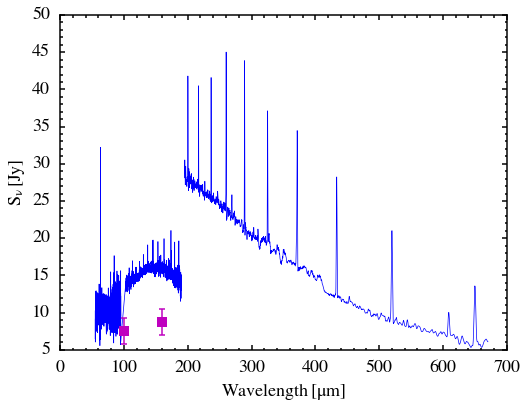

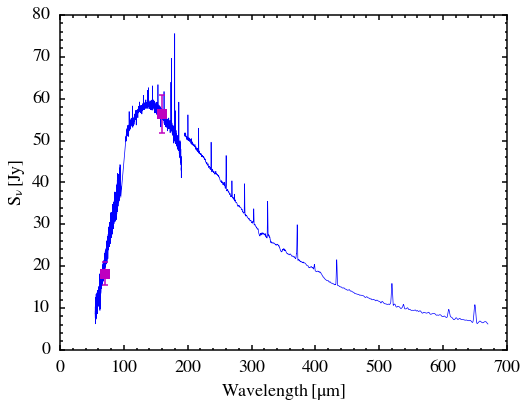

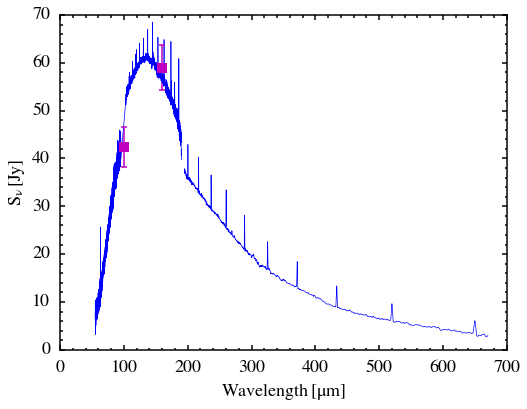

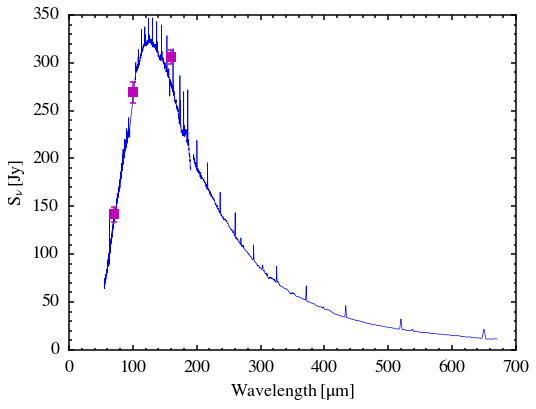

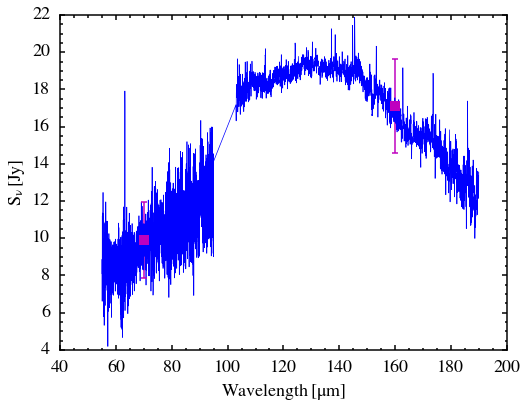

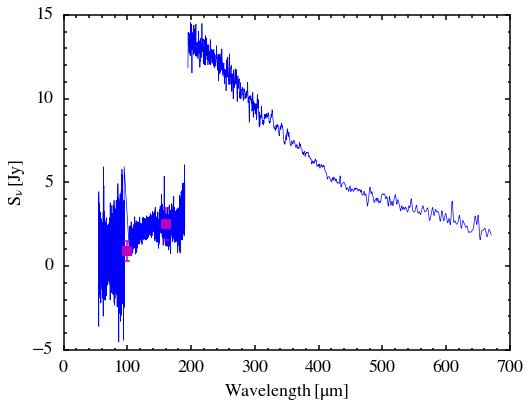

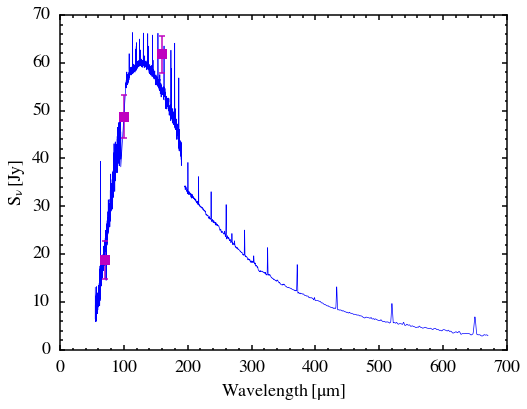

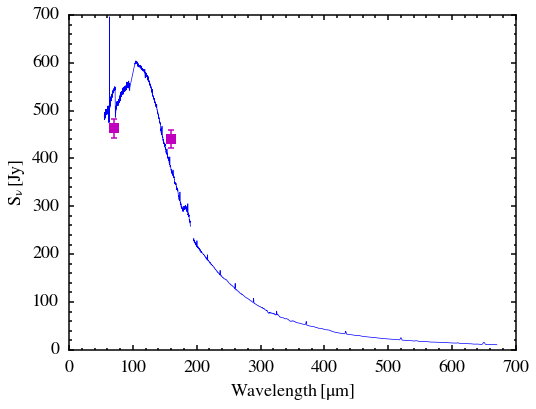

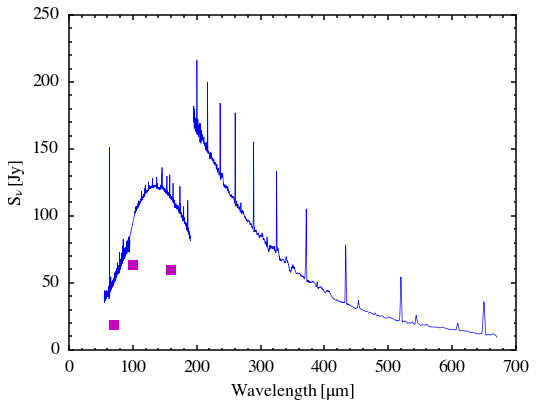

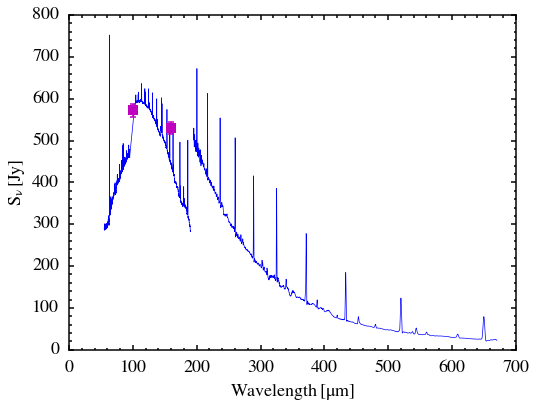

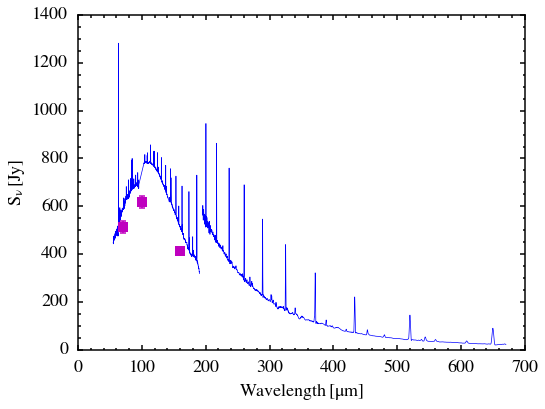

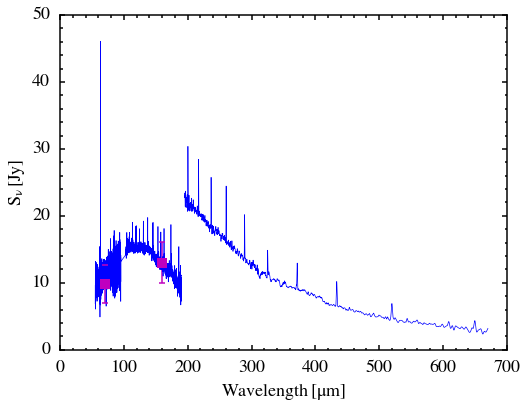

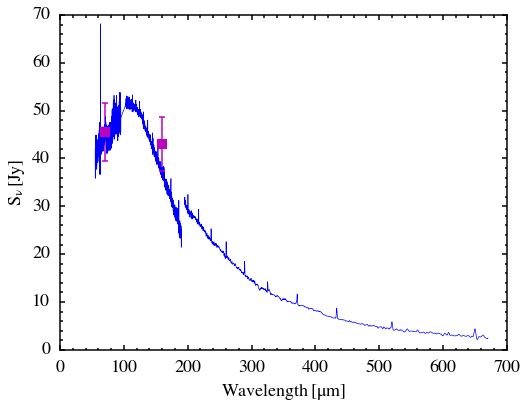

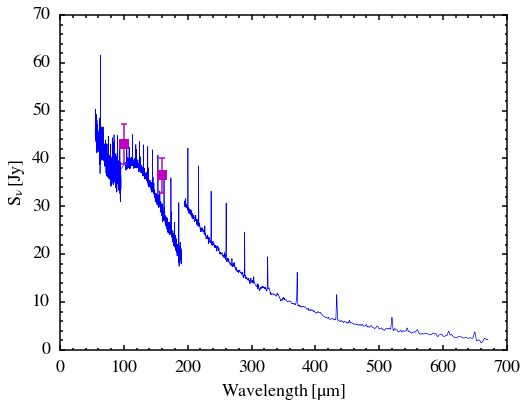

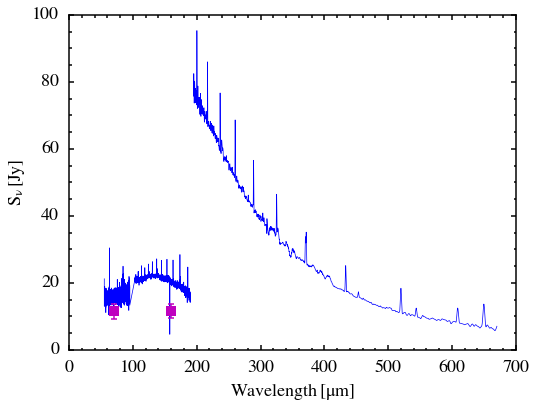

In [32]:
objlist = ['B1-a','B1-c','B335','BHR71','IRS46','L1014','L1157','L1551-IRS5','RCrA-IRS5A',
           'RCrA-IRS7B','RCrA-IRS7C','TMC1','TMC1A','TMR1','WL12']
for obj in objlist:
    PACS1d_inspect(obj)